In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score


In [2]:
############################
#QUESTION #4-1
############################
# Load and preprocess the cancer data
data_path = 'C:\\Users\\angel\\Downloads\\cancer.csv'
cancer_df = pd.read_csv(data_path)

# Convert diagnosis to binary
cancer_df['diagnosis'] = cancer_df['diagnosis'].map({'B': 0, 'M': 1})

# Drop the last column with NaN values
cancer_df = cancer_df.drop('Unnamed: 32', axis=1)

# Separate features and target variable
features = cancer_df.iloc[:, 2:].values
target = cancer_df.iloc[:, 1].values.astype(int)

# Standardize the features
features = StandardScaler().fit_transform(features)

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(features, target, train_size=0.8, test_size=0.2, random_state=0)

In [3]:
# Define function to train SVM models and evaluate them
def svm_train(x, y, kernel_type, k_range):
    accuracy_scores = []
    precision_scores = []
    recall_scores = []
    highest_accuracy = 0
    optimal_k = 0

    for n_components in k_range:
        pca = PCA(n_components=n_components)
        principal_components = pca.fit_transform(x)
        x_train_pca, x_test_pca, y_train_pca, y_test_pca = train_test_split(principal_components, y, train_size=0.8, test_size=0.2, random_state=0)

        classifier = SVC(kernel=kernel_type, C=3)
        classifier.fit(x_train_pca, y_train_pca)
        y_pred_pca = classifier.predict(x_test_pca)

        accuracy = accuracy_score(y_test_pca, y_pred_pca)
        precision = precision_score(y_test_pca, y_pred_pca)
        recall = recall_score(y_test_pca, y_pred_pca)

        accuracy_scores.append(accuracy)
        precision_scores.append(precision)
        recall_scores.append(recall)

        if accuracy > highest_accuracy:
            highest_accuracy = accuracy
            optimal_k = n_components

    return accuracy_scores, precision_scores, recall_scores, highest_accuracy, optimal_k

Linear Kernel - Optimum K: 8, Highest Accuracy: 0.9736842105263158


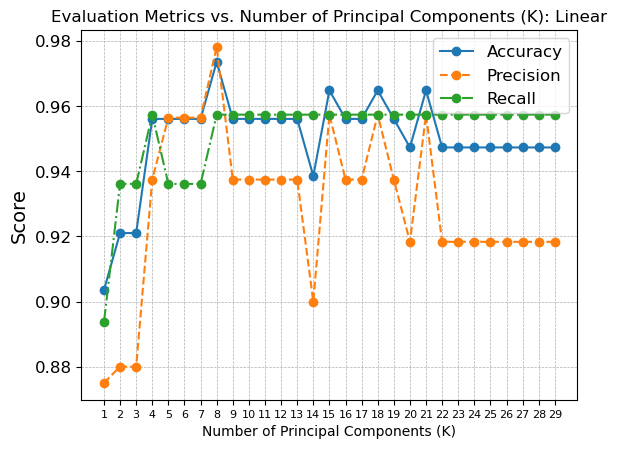

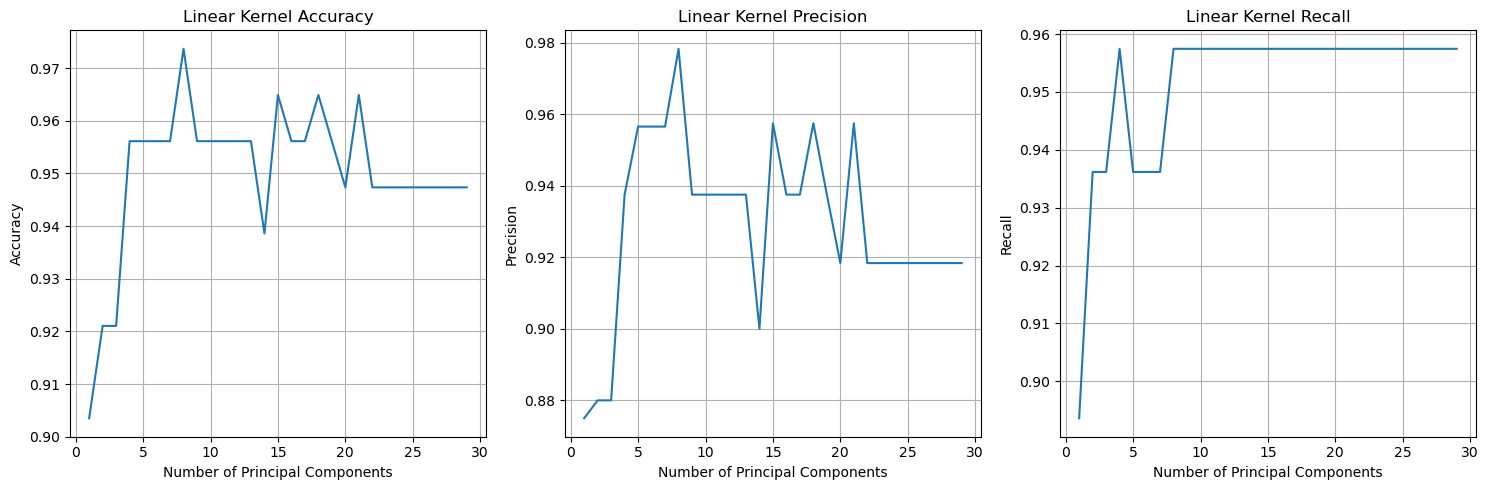

In [4]:
# Set the range of principal components
k_range = range(1, 30)

# Evaluate Linear Kernel
linear_accuracy, linear_precision, linear_recall, highest_linear_acc, optimal_linear_k = svm_train(features, target, 'linear', k_range)
print(f'Linear Kernel - Optimum K: {optimal_linear_k}, Highest Accuracy: {highest_linear_acc}')
##plotting
plt.plot(k_range, linear_accuracy, label='Accuracy',linestyle='-', marker='o')
plt.plot(k_range,linear_precision , label='Precision',linestyle='--', marker='o')
plt.plot(k_range, linear_recall, label='Recall',linestyle='-.', marker='o')


plt.xlabel('Number of Principal Components (K)')
plt.ylabel('Score',fontsize='14')
plt.title('Evaluation Metrics vs. Number of Principal Components (K): Linear')
plt.legend(fontsize=12)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.xticks(np.arange(1, 30, step=1), fontsize=8)
plt.show
plt.yticks(fontsize=12)

plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.plot(k_range, linear_accuracy, label='Accuracy')
plt.xlabel('Number of Principal Components')
plt.ylabel('Accuracy')
plt.title('Linear Kernel Accuracy')
plt.grid(True)

plt.subplot(1, 3, 2)
plt.plot(k_range, linear_precision, label='Precision')
plt.xlabel('Number of Principal Components')
plt.ylabel('Precision')
plt.title('Linear Kernel Precision')
plt.grid(True)

plt.subplot(1, 3, 3)
plt.plot(k_range, linear_recall, label='Recall')
plt.xlabel('Number of Principal Components')
plt.ylabel('Recall')
plt.title('Linear Kernel Recall')
plt.grid(True)
plt.tight_layout()
plt.show()

RBF Kernel - Optimum K: 8, Highest Accuracy: 0.9912280701754386


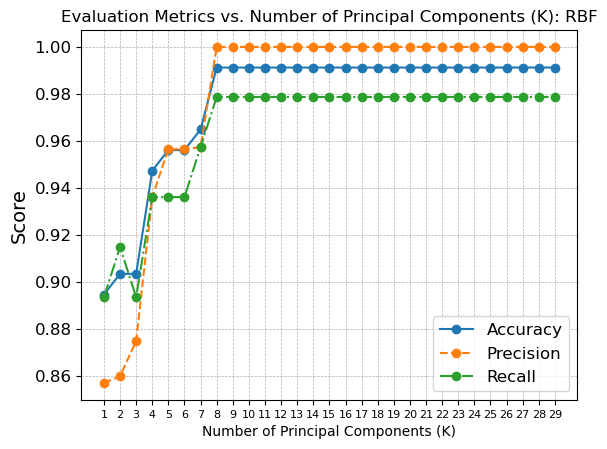

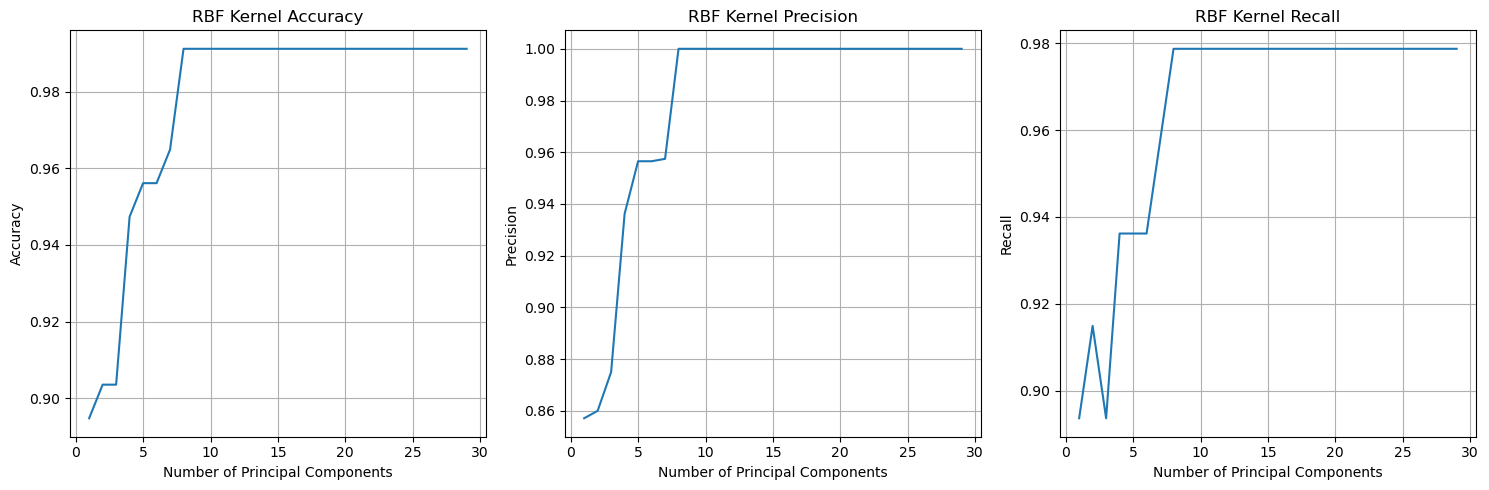

In [5]:
# Evaluate RBF Kernel
rbf_accuracy, rbf_precision, rbf_recall, highest_rbf_acc, optimal_rbf_k = svm_train(features, target, 'rbf', k_range)
print(f'RBF Kernel - Optimum K: {optimal_rbf_k}, Highest Accuracy: {highest_rbf_acc}')
##plotting
plt.plot(k_range, rbf_accuracy, label='Accuracy',linestyle='-', marker='o')
plt.plot(k_range,rbf_precision , label='Precision',linestyle='--', marker='o')
plt.plot(k_range, rbf_recall, label='Recall',linestyle='-.', marker='o')
plt.xlabel('Number of Principal Components (K)')
plt.ylabel('Score',fontsize='14')
plt.title('Evaluation Metrics vs. Number of Principal Components (K): RBF')
plt.legend(fontsize=12)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.xticks(np.arange(1, 30, step=1), fontsize=8)
plt.show
plt.yticks(fontsize=12)

plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.plot(k_range, rbf_accuracy, label='Accuracy')
plt.xlabel('Number of Principal Components')
plt.ylabel('Accuracy')
plt.title('RBF Kernel Accuracy')
plt.grid(True)

plt.subplot(1, 3, 2)
plt.plot(k_range, rbf_precision, label='Precision')
plt.xlabel('Number of Principal Components')
plt.ylabel('Precision')
plt.title('RBF Kernel Precision')
plt.grid(True)

plt.subplot(1, 3, 3)
plt.plot(k_range, rbf_recall, label='Recall')
plt.xlabel('Number of Principal Components')
plt.ylabel('Recall')
plt.title('RBF Kernel Recall')
plt.grid(True)
plt.tight_layout()
plt.show()

Poly Kernel - Optimum K: 4, Highest Accuracy: 0.9649122807017544


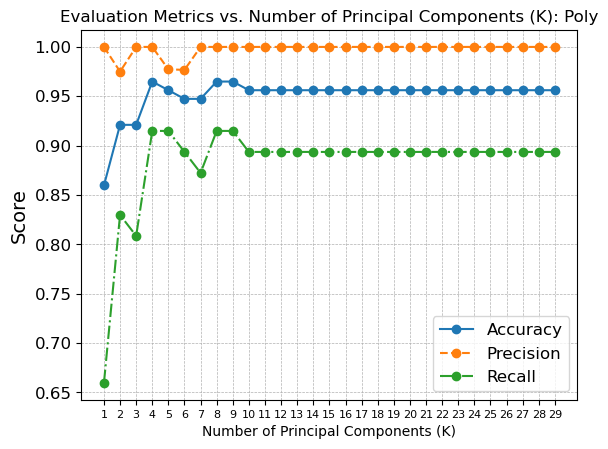

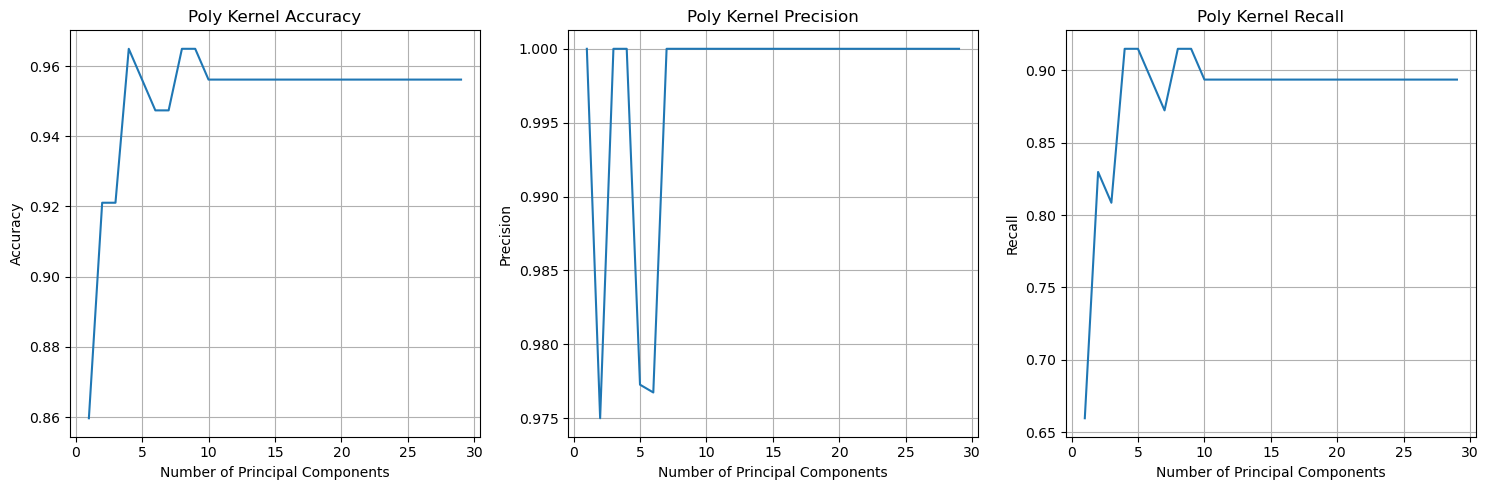

Optimum Number of K Principal Components for Linear Kernel: 8
Highest Accuracy for Linear Kernel: 0.9736842105263158
Optimum Number of K Principal Components for RBF Kernel: 8
Highest Accuracy for RBF Kernel: 0.9912280701754386
Optimum Number of K Principal Components for Poly Kernel: 4
Highest Accuracy for Poly Kernel: 0.9649122807017544


In [6]:
# Evaluate Poly Kernel
poly_accuracy, poly_precision, poly_recall, highest_poly_acc, optimal_poly_k = svm_train(features, target, 'poly', k_range)
print(f'Poly Kernel - Optimum K: {optimal_poly_k}, Highest Accuracy: {highest_poly_acc}')
##plotting
plt.plot(k_range, poly_accuracy, label='Accuracy',linestyle='-', marker='o')
plt.plot(k_range,poly_precision , label='Precision',linestyle='--', marker='o')
plt.plot(k_range, poly_recall, label='Recall',linestyle='-.', marker='o')
plt.xlabel('Number of Principal Components (K)')
plt.ylabel('Score',fontsize='14')
plt.title('Evaluation Metrics vs. Number of Principal Components (K): Poly')
plt.legend(fontsize=12)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.xticks(np.arange(1, 30, step=1), fontsize=8)
plt.show
plt.yticks(fontsize=12)




plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.plot(k_range, poly_accuracy, label='Accuracy')
plt.xlabel('Number of Principal Components')
plt.ylabel('Accuracy')
plt.title('Poly Kernel Accuracy')
plt.grid(True)

plt.subplot(1, 3, 2)
plt.plot(k_range, poly_precision, label='Precision')
plt.xlabel('Number of Principal Components')
plt.ylabel('Precision')
plt.title('Poly Kernel Precision')
plt.grid(True)

plt.subplot(1, 3, 3)
plt.plot(k_range, poly_recall, label='Recall')
plt.xlabel('Number of Principal Components')
plt.ylabel('Recall')
plt.title('Poly Kernel Recall')
plt.grid(True)
plt.tight_layout()
plt.show()

print(f'Optimum Number of K Principal Components for Linear Kernel: {optimal_linear_k}')
print(f'Highest Accuracy for Linear Kernel: {highest_linear_acc}')
print(f'Optimum Number of K Principal Components for RBF Kernel: {optimal_rbf_k}')
print(f'Highest Accuracy for RBF Kernel: {highest_rbf_acc}')
print(f'Optimum Number of K Principal Components for Poly Kernel: {optimal_poly_k}')
print(f'Highest Accuracy for Poly Kernel: {highest_poly_acc}')

In [7]:
############################
#QUESTION #4-2
############################
# Load and preprocess the housing data
data_path = 'C:\\Users\\angel\\Downloads\\housing.csv'
housing_df = pd.read_csv(data_path)

# Convert categorical yes/no variables to binary
variable_list = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']

def binary_mapping(x):
    return x.map({'no': 0, 'yes': 1})

housing_df[variable_list] = housing_df[variable_list].apply(binary_mapping)
housing_df = housing_df.drop('furnishingstatus', axis=1)

# Separate features and target variable
x = housing_df.drop('price', axis=1)
y = housing_df['price']

# Standardize the features
x = StandardScaler().fit_transform(x)

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, test_size=0.2, random_state=0)

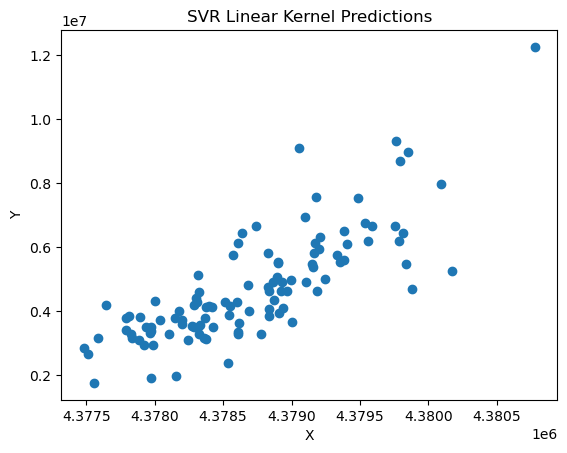

In [8]:
# Train and plot SVR model for visualization
classifier = SVR(kernel='linear')
classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_test)
plt.scatter(y_pred, y_test)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('SVR Linear Kernel Predictions')
plt.show()

# Define function to train SVR models and evaluate them
def svm_train(x, y, kernel, K):
    mse_scores = []
    lowest_mse = float('inf')
    optimal_k = 0

    for n_components in K:
        pca = PCA(n_components=n_components)
        x_pca = pca.fit_transform(x)

        x_train, x_test, y_train, y_test = train_test_split(x_pca, y, train_size=0.8, test_size=0.2, random_state=0)

        if kernel == 'linear':
            model = SVR(kernel=kernel, C=1)
        elif kernel == 'poly':
            model = SVR(kernel=kernel, degree=2, C=1)
        else:  # kernel == 'rbf'
            model = SVR(kernel=kernel, C=1, gamma='scale')

        model.fit(x_train, y_train)
        y_pred = model.predict(x_test)
        mse = mean_squared_error(y_test, y_pred)
        mse_scores.append(mse)

        if mse < lowest_mse:
            lowest_mse = mse
            optimal_k = n_components

    return mse_scores, lowest_mse, optimal_k

In [9]:
# Range of principal components to test
k_range = range(1, x.shape[1] + 1)

# Train models with different kernels and get their performance
lin_mse_scores, lin_lowest_mse, lin_optimal_k = svm_train(x, y, 'linear', k_range)
rbf_mse_scores, rbf_lowest_mse, rbf_optimal_k = svm_train(x, y, 'rbf', k_range)
poly_mse_scores, poly_lowest_mse, poly_optimal_k = svm_train(x, y, 'poly', k_range)

# Print the results
print(f'Linear Kernel MSE Scores: {lin_mse_scores}\nOptimal K: {lin_optimal_k}\nLowest MSE: {lin_lowest_mse}')
print(f'RBF Kernel MSE Scores: {rbf_mse_scores}\nOptimal K: {rbf_optimal_k}\nLowest MSE: {rbf_lowest_mse}')
print(f'Poly Kernel MSE Scores: {poly_mse_scores}\nOptimal K: {poly_optimal_k}\nLowest MSE: {poly_lowest_mse}')


Linear Kernel MSE Scores: [2998320788717.05, 2998321978412.629, 2998323370338.4717, 2998330319555.039, 2998348832018.407, 2998345864443.5615, 2998349209193.6416, 2998344116981.553, 2998351919649.6895, 2998356049690.573, 2998345161056.1997]
Optimal K: 1
Lowest MSE: 2998320788717.05
RBF Kernel MSE Scores: [3000079422621.5303, 3000140710335.6387, 3000167183888.7935, 3000173867906.3467, 3000185799128.3843, 3000191207361.065, 3000194881957.0195, 3000198086589.295, 3000202122182.9395, 3000204814856.728, 3000206286239.0996]
Optimal K: 1
Lowest MSE: 3000079422621.5303
Poly Kernel MSE Scores: [3000128722052.5425, 3000127571179.8267, 3000176288261.339, 3000201116782.882, 3000213647876.966, 3000217077136.7275, 3000223267785.3916, 3000227713368.1973, 3000226213651.604, 3000228929723.2144, 3000229986807.9976]
Optimal K: 2
Lowest MSE: 3000127571179.8267


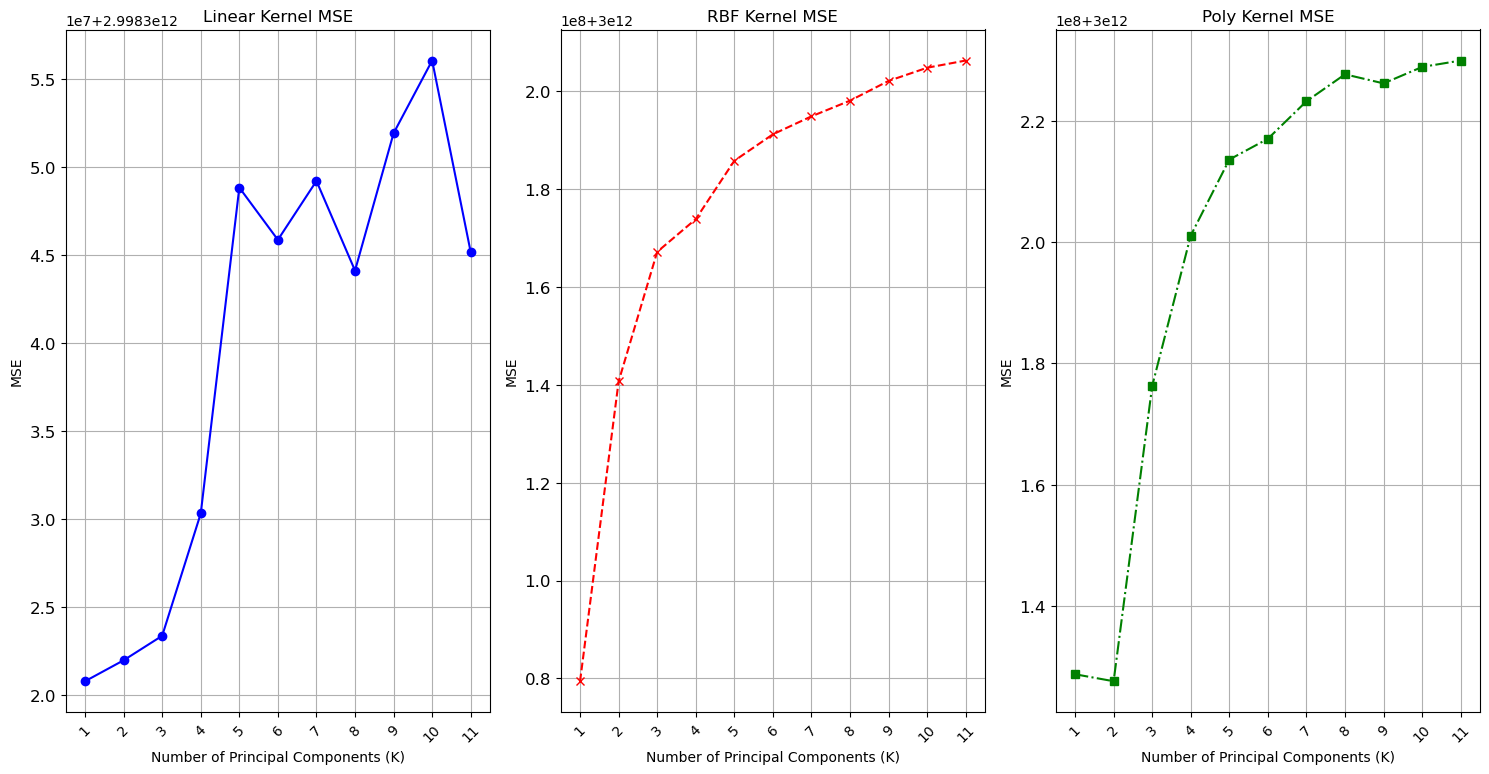

In [11]:
# Plot the results
plt.figure(figsize=(15, 8))

plt.subplot(1, 3, 1)
plt.plot(k_range, lin_mse_scores, marker='o', linestyle='-', color='b')
plt.title('Linear Kernel MSE')
plt.xlabel('Number of Principal Components (K)')
plt.ylabel('MSE')
plt.xticks(np.arange(1, len(k_range)+1, step=1), fontsize=10, rotation=45)
plt.yticks(fontsize=12)
plt.grid(True)

plt.subplot(1, 3, 2)
plt.plot(k_range, rbf_mse_scores, marker='x', linestyle='--', color='r')
plt.title('RBF Kernel MSE')
plt.xlabel('Number of Principal Components (K)')
plt.ylabel('MSE')
plt.xticks(np.arange(1, len(k_range)+1, step=1), fontsize=10, rotation=45)
plt.yticks(fontsize=12)
plt.grid(True)

plt.subplot(1, 3, 3)
plt.plot(k_range, poly_mse_scores, marker='s', linestyle='-.', color='g')
plt.title('Poly Kernel MSE')
plt.xlabel('Number of Principal Components (K)')
plt.ylabel('MSE')
plt.xticks(np.arange(1, len(k_range)+1, step=1), fontsize=10, rotation=45)
plt.yticks(fontsize=12)
plt.grid(True)

plt.tight_layout()
plt.show()
